This notebook gives examples of how to interact with the high-level data products from the VAST Extragalactic DR1.
These products are described in detail in The ASKAP Variables and Slow Transients (VAST) Extragalactic Survey – Data Release 1: [light curve database and cutouts](https://doi.org/10.25919/nh9d-t846)

This notebook downloads the light curve database locally. This is a collection of three tables. These tables are described in Appendix 2 of the de Ruiter et al (2026). In short, each source has one entry in the 'source' table, describing summary statistics for that source. The individual measurements for each source are described in the 'measurement' table. Finally, there is an image table, describing the individual observations/images making up VAST Extragalactic DR1. 
This notebook also shows how to download and inspect the cutouts that are readily available for all 550k sources in this data release.


## Python environment
Follow the instructions in the the [README](https://github.com/IrisdeRuiter/VAST_Extragalactic_DR1/tree/main) to create a custom conda environment: vast_env.

This environment contains the basic python and astronomy packages, as well as vaex, which we need to read in the large light curve database tables efficiently.
See the documentation on:
https://vaex.readthedocs.io/en/latest/

In [1]:
# A quick check to see if things are set up correctly
import os
import importlib.util

print('Checking python packages')

for package in ['numpy', 'pandas','vaex','matplotlib', 'astropy', 'requests', 'pickle']:
    spam_spec = importlib.util.find_spec(package)
    found = spam_spec is not None
    if found:
        print("\u2705" + f' Found package {package}')
    else:
        print('\U0000274C' + f' Did not find required package {package}, some aspects of this example notebook may not work.')
        print('Create a conda environment using the environment.yaml file, or install the required package.')

Checking python packages
✅ Found package numpy
✅ Found package pandas
✅ Found package vaex
✅ Found package matplotlib
✅ Found package astropy
✅ Found package requests
✅ Found package pickle


In [2]:
# Import packages that are required to read the light curve database tables
# and plot the light curves.
# Include import os again, in case the previous cell was not run
import os                       # File paths, environment variables, directory operations
import numpy as np              # Fast numerical arrays and math utilities
import pandas as pd            # Tabular data handling and analysis
import vaex                    # Out‑of‑core DataFrame processing for large datasets
import matplotlib.pyplot as plt # Plotting and basic visualizations

from download_tools.download_urls import get_file # custom function that will be used to download files
import pickle                   # Reading dictionaries cutouts_dict.pkl and lightcurves_dict.pkl to
                                # fetch download links for files

## Download and light curve database tables

In [3]:
light_curve_path = 'lightcurves/'
# If this directory doesn't exist yet, create the directory and download the files
if not os.path.isdir(light_curve_path):
    os.makedirs(light_curve_path)
    
    with open("download_tools/lightcurves_dict.pkl", "rb") as f:
        lightcurve_dict = pickle.load(f)
    for filename, url in lightcurve_dict.items():
        get_file(url, light_curve_path, filename)


Saved VAST_Extragal_DR1_image_df.csv to lightcurves/
Saved VAST_Extragal_DR1_measurement_df.parquet to lightcurves/
Saved VAST_Extragal_DR1_source_df.parquet to lightcurves/


Initialise each of the tables in the light curve database. The measurement table is particularly large (6.5 million rows), so this will take a couple of seconds.

In [4]:
measurements = vaex.open(light_curve_path+'VAST_Extragal_DR1_measurement_df.parquet')
sources = vaex.open(light_curve_path+'VAST_Extragal_DR1_source_df.parquet')
images = pd.read_csv(light_curve_path+'VAST_Extragal_DR1_image_df.csv')

### Data exploration

Explore the structure of the light curve database tables. The columns are detailed in Appendix 2 of The ASKAP Variables and Slow Transients (VAST) Extragalactic Survey – Data Release 1.

In [5]:
measurements.head(5) # show the first five entries in the measurement table

#,source,local_rms,ra,ra_err,dec,dec_err,flux_peak,flux_peak_err,flux_int,flux_int_err,bmaj,err_bmaj,bmin,err_bmin,pa,err_pa,psf_bmaj,psf_bmin,psf_pa,flag_c4,chi_squared_fit,spectral_index,spectral_index_from_TT,has_siblings,image_id,time,snr,compactness,forced
0,13297621,0.517,322.579,0.000108333,-9.46086,0.000188889,259.044,0.493,281.537,0.869,13.69,0.02,11.84,0.02,77.05,0.01,4.14,2.93,-63.1,False,1030.36,-0.12,True,False,8721,2024-06-17 19:50:38.300000,501.052,1.08683,False
1,13297621,0.771,322.579,0.000163889,-9.46035,0.000130556,216.741,0.715,234.384,1.285,13.86,0.04,11.83,0.04,77.29,0.01,4.2,2.75,-76.07,False,208.391,0.33,True,False,9613,2024-12-24 07:54:27.200000,281.117,1.0814,False
2,13297621,0.672,322.579,0.000138889,-9.4601,0.000113889,227.602,0.647,239.301,1.139,15.73,0.04,11.45,0.03,81.36,0.01,3.81,2.14,-79.07,False,133.402,0.5,True,False,7701,2023-07-06 20:15:46.600000,338.693,1.0514,False
3,13297621,0.813,322.579,0.000130556,-9.46021,0.000163889,243.324,0.767,258.689,1.368,14.7,0.05,11.5,0.04,91.49,0.01,3.8,2.61,86.35,False,110.798,0.39,True,False,7976,2023-08-31 13:54:45.100000,299.292,1.06315,False
4,13297621,0.53,322.579,0.000161111,-9.46075,0.000194444,253.761,0.517,270.889,0.902,15.61,0.03,11.85,0.02,81.79,0,3.98,2.69,-61.72,False,253.676,0.17,True,False,8469,2024-04-21 00:43:27.900000,478.794,1.0675,False


In [6]:
# Print the columns of the measurements table
measurements_cols = measurements.get_column_names()
print(measurements_cols)

['source', 'local_rms', 'ra', 'ra_err', 'dec', 'dec_err', 'flux_peak', 'flux_peak_err', 'flux_int', 'flux_int_err', 'bmaj', 'err_bmaj', 'bmin', 'err_bmin', 'pa', 'err_pa', 'psf_bmaj', 'psf_bmin', 'psf_pa', 'flag_c4', 'chi_squared_fit', 'spectral_index', 'spectral_index_from_TT', 'has_siblings', 'image_id', 'time', 'snr', 'compactness', 'forced']


In [7]:
sources.head(5)

#,source,wavg_ra,wavg_dec,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_compactness,min_snr,max_snr,avg_flux_peak,avg_flux_int,max_flux_peak,max_flux_int,min_flux_peak,min_flux_int,n_measurements,n_selavy,n_forced,n_siblings,n_relations,v_int,v_peak,eta_int,eta_peak,n_neighbour_dist
0,13297621,322.58,-9.46049,4.58562e-05,4.58562e-05,1.07274,231.316,528.519,230.849,247.429,281.829,296.567,188.451,203.312,21,21,0,0,0,0.108193,0.114098,659.186,1969.06,0.112157
1,13297628,321.489,-3.98248,7.30076e-05,7.30076e-05,1.05511,191.153,718.345,182.139,192.171,184.643,193.751,179.873,189.635,11,11,0,0,0,0.00714643,0.00793162,5.21096,20.6885,0.103505
2,13297679,320.202,-3.50858,7.30212e-05,7.30212e-05,1.07245,134.763,478.445,105.96,113.622,109.792,117.354,99.515,107.225,11,11,0,0,0,0.027529,0.0313603,61.4287,202.255,0.0538646
3,13297696,322.242,-3.06322,5.34506e-05,5.34506e-05,1.10856,64.8658,301.777,98.4592,109.042,106.574,114.014,89.237,104.555,22,22,0,0,0,0.030008,0.0464773,22.3601,140.513,0.0818175
4,13297702,319.625,-3.21705,5.34733e-05,5.34733e-05,1.20078,98.2316,305.363,90.5281,108.671,96.142,114.077,85.058,104.651,22,22,0,0,0,0.0224778,0.028976,18.6598,76.3262,0.15193


In [8]:
# Print the columns of the sources table
sources_cols = sources.get_column_names()
print(sources_cols)

['source', 'wavg_ra', 'wavg_dec', 'wavg_uncertainty_ew', 'wavg_uncertainty_ns', 'avg_compactness', 'min_snr', 'max_snr', 'avg_flux_peak', 'avg_flux_int', 'max_flux_peak', 'max_flux_int', 'min_flux_peak', 'min_flux_int', 'n_measurements', 'n_selavy', 'n_forced', 'n_siblings', 'n_relations', 'v_int', 'v_peak', 'eta_int', 'eta_peak', 'n_neighbour_dist']


In [9]:
images.head()

,Unnamed: 0,image_id,name,datetime,jd,duration,physical_bmaj,physical_bmin,radius_pixels,beam_bmaj,beam_bmin,beam_bpa,rms_median,rms_min,rms_max,centre_ra,centre_dec,SBID
0,0,7251,VAST_Extragal_DR1_VAST_0126+00.SB50516.image.fits,2023-06-14 01:36:10.100000+00:00,2.460110e+06,716.636,6.670153,6.670153,6791.760633,0.004306,0.003444,87.48,0.229664,0.147061,7.259012,21.724430,-0.000868,50516
1,1,7252,VAST_Extragal_DR1_VAST_0126+06.SB50515.image.fits,2023-06-14 01:22:53.800000+00:00,2.460110e+06,736.543,6.670125,6.670125,6791.760633,0.004083,0.003694,-62.92,0.241203,0.149013,1.218779,21.724397,6.294330,50515
2,2,7253,VAST_Extragal_DR1_VAST_0151+00.SB50517.image.fits,2023-06-14 01:49:56.200000+00:00,2.460110e+06,726.589,6.670139,6.670139,6791.760633,0.004278,0.003389,83.90,0.222117,0.152354,0.860733,27.931328,-0.000468,50517
3,3,7254,VAST_Extragal_DR1_VAST_0216+00.SB50518.image.fits,2023-06-14 02:03:02.500000+00:00,2.460110e+06,716.636,6.670125,6.670125,6791.760633,0.004222,0.003361,79.78,0.246529,0.162676,1.566944,34.138179,-0.000575,50518
4,4,7255,VAST_Extragal_DR1_VAST_0216-06.SB50519.image.fits,2023-06-14 02:16:48.600000+00:00,2.460110e+06,726.589,6.670153,6.670153,6791.760633,0.004278,0.003111,79.25,0.206153,0.138600,0.857852,34.138411,-6.299960,50519


In [10]:
images.columns

Index(['Unnamed: 0', 'image_id', 'name', 'datetime', 'jd', 'duration',
       'physical_bmaj', 'physical_bmin', 'radius_pixels', 'beam_bmaj',
       'beam_bmin', 'beam_bpa', 'rms_median', 'rms_min', 'rms_max',
       'centre_ra', 'centre_dec', 'SBID'],
      dtype='object')

## Basic filtering

In the following cells we show how to filter these tables. You can imagine filtering on coordinates to get to your sources of interest. 

Below we provide a simple example were we want to find bright objects (100 - 200 mJy), that have a maximum flux density > 125% their average flux density.

In [11]:
filter1 = ((sources.avg_flux_int > 100) & 
           (sources.avg_flux_int < 200) &
           (sources.max_flux_int > (1.25*sources.avg_flux_int)))
sources[filter1]

#,source,wavg_ra,wavg_dec,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_compactness,min_snr,max_snr,avg_flux_peak,avg_flux_int,max_flux_peak,max_flux_int,min_flux_peak,min_flux_int,n_measurements,n_selavy,n_forced,n_siblings,n_relations,v_int,v_peak,eta_int,eta_peak,n_neighbour_dist
0,13499287,93.7903,-4.18693,5.72483e-05,5.72483e-05,2.0512,94.1225,174.241,69.4215,141.969,81.105,200.42,62.215,114.241,11,11,0,11,0,0.148788,0.0683098,1773.5,299.19,0.0797585
1,13512523,310.703,-1.81952,5.9376e-05,5.9376e-05,1.07704,292.21,467.548,108.472,116.818,146.81,157.083,96.015,102.789,11,11,0,0,0,0.13142,0.132526,823.504,2202.53,0.0456145
2,13686716,73.3187,-9.50709,6.20069e-05,6.20069e-05,1.05554,257.958,427.969,125.955,132.962,157.611,166.531,106.995,113.444,10,10,0,0,0,0.137002,0.135713,856.894,2328.42,0.0572952
3,14155510,110.349,4.11218,6.33875e-05,6.33875e-05,1.06878,401.851,911.84,184.696,197.222,289.965,307.891,110.509,119.596,11,11,0,0,0,0.297552,0.300898,12748.2,32972.5,0.0250026
4,14213317,145.589,-7.99805,4.96536e-05,4.96536e-05,1.08071,327.253,554.711,136.166,147.035,195.005,209.516,116.251,125.467,11,11,0,0,0,0.173441,0.178734,1512.22,4302.22,0.129858
5,14490964,314.778,-33.8865,4.81623e-05,4.81623e-05,1.14397,322.416,572.222,108.328,123.801,141.911,158.887,96.953,110.445,11,11,0,0,0,0.108333,0.118316,1111.76,3310.91,0.0896796
6,14517141,306.473,-28.7636,5.4373e-05,5.4373e-05,1.08469,403.144,748.319,158.697,172.149,208.781,225.995,112.074,120.52,11,11,0,0,0,0.168814,0.168561,3756.13,9787.7,0.0176244
7,14674070,63.3904,-43.4021,5.49147e-05,5.49147e-05,1.0532,403.713,520.274,104.131,109.593,131.109,137.111,92.999,99.133,10,10,0,0,0,0.102577,0.108445,737.302,2374.71,0.042477
8,14801130,79.6172,-48.7028,5.36397e-05,5.36397e-05,1.05571,253.847,431.878,97.0189,102.434,127.404,134.035,81.128,85.119,10,10,0,0,0,0.165603,0.165197,1069.08,3023.58,0.124153


To visualise what the light curve of the first source (13499287) in this output table looks like, we can use the `tools_plot_lc()` function.

In [12]:
def tools_plot_lc(source_ID, pretty_name=None, save=False):
    """
    Plot the light curve for a given radio source.

    Parameters
    ----------
    source_ID : str or int
        Identifier of the source whose light curve will be plotted. This value
        is used to select rows from the global `measurements` table.

    pretty_name : str, optional
        A human‑friendly name to use as the plot title. If not provided, the
        title defaults to the `source_ID`.

    save : bool, optional
        If True, the light curve is saved as a PNG file named
        ``<source_ID>_lc.png``. Default is False.

    Notes
    -----
    The function extracts all flux measurements for the specified source from
    the global `measurements` table and plots integrated flux density as a
    function of time. Error bars represent the measurement uncertainties.

    Two types of points are distinguished:
      - **Detections** (forced == False): plotted as filled black circles.
      - **Forced extractions** (forced == True): plotted as open circles.

    The x‑axis tick labels are rotated for readability, and the y‑axis is
    labeled with the integrated flux density in mJy.

    The function displays the plot and optionally saves it to disk.
    """
    # Query the measurements table to get the individual measurements for this source
    source_data = measurements[measurements.source == source_ID]

    # Plot the light curve (integrated flux vs time) including errors on the flux
    fig,ax = plt.subplots(1,1, figsize=(4,2))
    ax.errorbar(source_data.time.values, source_data.flux_int.values,
                 yerr=source_data.flux_int_err.values, color='k', fmt="none")

    # Add filled in large markers for points that are detected by the source finder (>5sigma)
    not_forced = source_data[source_data.forced==False]
    ax.scatter(not_forced.time.values, not_forced.flux_int.values, marker='o', color='k',s=20)

    # Add open smaller markers for forced flux extractions
    not_forced = source_data[source_data.forced==True]
    ax.scatter(not_forced.time.values, not_forced.flux_int.values, marker='o', color='k', 
               facecolor='w',zorder=10, s=15)

    # Format axis
    ax.tick_params(axis='x', labelrotation=60)#, ha='right')
    ax.set_ylabel(r'$S_{\rm{int}}$ [mJy]', fontsize=12)

    # Set title
    if pretty_name is not None:
        ax.set_title('ASKAP '+pretty_name, fontsize=12)
    else:
        ax.set_title(source_ID, fontsize=12)
    
    if save ==True:
        plt.savefig(f'{source_ID}_lc.png', bbox_inches='tight')
    
    plt.show()

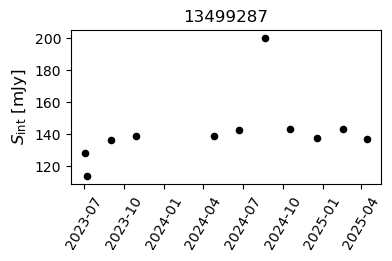

In [13]:
tools_plot_lc(source_ID = 13499287)

This plot shows the integrated flux density of source 13499287 over time. The errorbars are included, but in this case are too small to show up in the plot. The gap in the light curve (around 2024-01) arises from a gap in coverage due to the holography issue described in section 2.2 and Appendix 1 of the paper.

We clearly see the flux outlier we expect to see based on the filtering in the previous step. To see whether the outlier in this light curve is real, we should inspect the images.

## Download and inspect cutouts

The following code allows you to download cutouts from the DAP based on source_ID to your local machine.

In [14]:
# Check if a directory exists to save the cutouts to

cutout_dir = 'cutouts/'

if not os.path.isdir(cutout_dir):
    os.makedirs(cutout_dir)

with open("download_tools/cutouts_dict.pkl", "rb") as f:
    cutouts_dict = pickle.load(f)

def download_cutout(source_ID):
    url = cutouts_dict[str(source_ID)]
    get_file(url, cutout_dir, f'{source_ID}_VAST_Extragal_DR1_compressed_multi_extension.fits')

The code below allows you to read the fits cutouts, and show them in this notebook.

In [15]:

from matplotlib.patches import Ellipse
from astropy.wcs.utils import proj_plane_pixel_scales

def tools_plot_gaussian_fit(ax, wcs, ra, dec, major, minor, pa):
    """
        Plot a 2D Gaussian ellipse on a WCS‑projected image.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes object on which the ellipse will be drawn. Must use a WCS
        projection consistent with the provided `wcs` object.

    wcs : astropy.wcs.WCS
        WCS transformation associated with the displayed image. Used to convert
        sky coordinates (RA, Dec) and angular sizes into pixel coordinates.

    ra : float
        Right Ascension of the Gaussian center, in degrees.

    dec : float
        Declination of the Gaussian center, in degrees.

    major : float
        Full width of the Gaussian major axis, in arcsec.

    minor : float
        Full width of the Gaussian minor axis, in arcsec.

    pa : float
        Position angle of the Gaussian ellipse, in degrees. Measured
        counter‑clockwise from the positive x‑axis (east of north in typical
        astronomical convention).

    Returns
    -------
    ax : matplotlib.axes.Axes
        The same axes object, with the Gaussian ellipse added as a patch.

    Notes
    -----
    This function converts the input sky coordinates and angular sizes into
    pixel coordinates using the supplied WCS object, then draws the ellipse
    directly in data space so it appears at the correct sky location on the
    image.
    """
    
    x_pix, y_pix = wcs.world_to_pixel_values(ra, dec)
    
    # Convert major/minor axes from degrees → pixels
    pix_scale = proj_plane_pixel_scales(wcs)
    sx, sy = pix_scale[0], pix_scale[1]
    degrees_per_pixel = np.sqrt(sx * sy)

    # Convert from arcsec to degree, to pixel
    major_pix = major / 3600 / degrees_per_pixel
    minor_pix = minor / 3600 / degrees_per_pixel
    
    # Draw ellipse directly in data coordinates
    e = Ellipse((x_pix, y_pix),
        width=minor_pix,height=major_pix,angle=pa,
        facecolor='none',edgecolor='white',
        linewidth=1.5,linestyle = '--')

    ax.add_patch(e)
    return ax


In [16]:
from astropy.io import fits
from astropy.io.fits import Header

from astropy.wcs import WCS

import warnings
from astropy.wcs import FITSFixedWarning
# Ignore FITSFixedWarning specifically when raised by the astropy.wcs package
warnings.simplefilter('ignore', category=FITSFixedWarning)


def tools_inspect_fits(source_ID):
    """
    Visualise all FITS cutouts for a given source across multiple epochs.

    This function loads a locally downloaded multi-extension FITS cutout file
    associated with the specified 'source_ID' and displays each image (one per
    timestamp) along with the source position and fitted Gaussian parameters.
    It assumes that the cutout file is stored in 'cutout_dir' and that a global
    'measurements' table contains the per-epoch source properties.

    Parameters
    ----------
    source_ID : str or int
        Identifier of the source to inspect. Used to locate the corresponding
        FITS cutout file and to select the matching measurement entries.

    Notes
    -----
    - The function expects a file named
      '<source_ID>_VAST_Extragal_DR1_compressed_multi_extension.fits' to be
      present in `cutout_dir`.
    - Each image extension (HDU) is assumed to correspond to a different
      observation epoch. The primary HDU is skipped.
    - For each epoch, the function:
        * Displays the FITS cutout using its WCS projection.
        * Overlays a Gaussian ellipse derived from the measurement table
          (major/minor axes, position angle, RA/Dec).
        * Annotates the integrated flux density.
        * Uses the observation date ('DATE-OBS') as the plot title.
    - The function produces one figure per epoch and displays them sequentially.

    This tool is intended for quick visual inspection of variability,
    positional consistency, and source morphology across epochs.
    """

    print(f'Plotting fits cutouts for source {source_ID}')
    # Initialise filename.
    file_name = cutout_dir + f'{source_ID}_VAST_Extragal_DR1_compressed_multi_extension.fits'
    hdul_list = fits.open(file_name)
    
    # Initialise the source data, used to plot the source ellipse and flux
    source_data = measurements[measurements.source == source_ID].sort(by='time')
    print(f'There are {len(source_data)} measurements/datapoints/images for this source.')
    
    # Loop over the cutouts.
    for i in range(1,len(hdul_list)): # Skip over the mandatory PrimaryHDU
        # i represents the HDU/image index
        data1 = hdul_list[i].data # Read in the data
        wmap = WCS(hdul_list[i].header, naxis=2) # Read in the WCS element

        
        fig = plt.figure(figsize=(3, 3), dpi=100)
        ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wmap)
        ax1.imshow(data1, origin='lower', cmap='magma_r')

        # Note that we can't follow the index of the HDUs as we skip 
        # the first HDU (which is not an imageHDU)
        m = i - 1 # m represents the measurement index
        tools_plot_gaussian_fit(ax1, wmap, ra=float(source_data.ra.values[m]), dec=float(source_data.dec.values[m]),
                         major=float(source_data.bmaj.values[m]), minor=float(source_data.bmin.values[m]), 
                          pa=float(source_data.pa.values[m]))
        ax1.text(0, 0, r'$S_{int}=$'+'{:.2f} mJy'.format(float(source_data.flux_int.values[m])))
        # Use the observation date as the plot title
        ax1.set_title(hdul_list[i].header['DATE-OBS'])
        plt.show()

Saved 13499287_VAST_Extragal_DR1_compressed_multi_extension.fits to cutouts/
Plotting fits cutouts for source 13499287
There are 11 measurements/datapoints/images for this source.


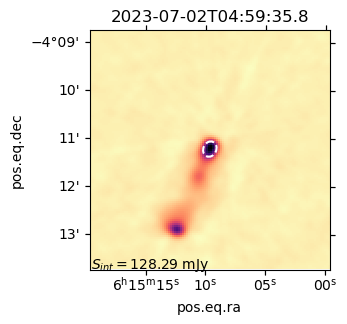

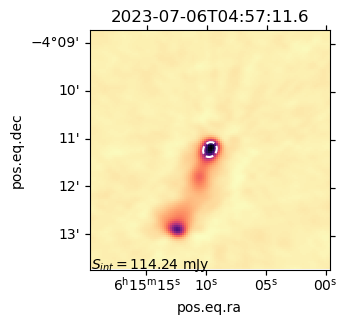

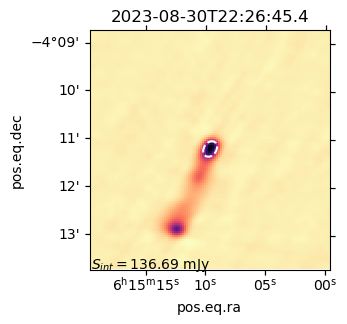

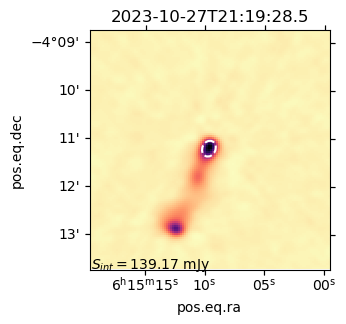

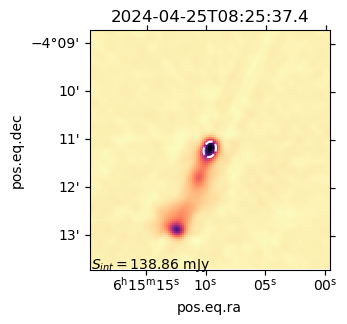

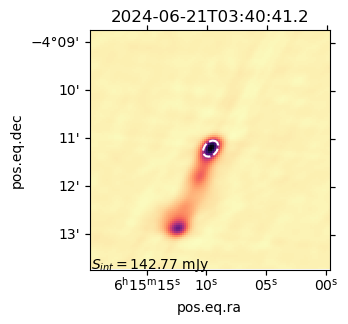

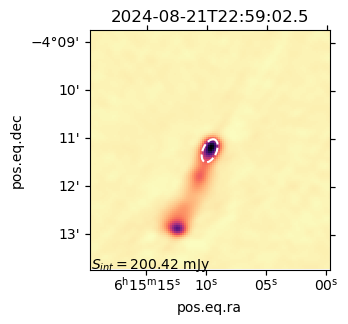

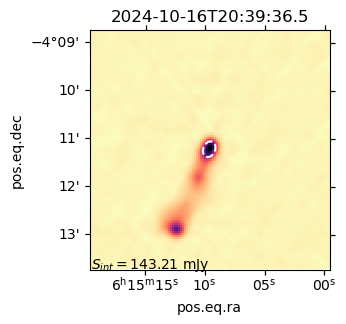

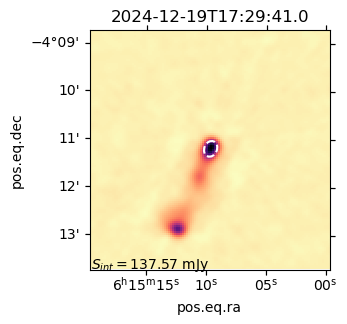

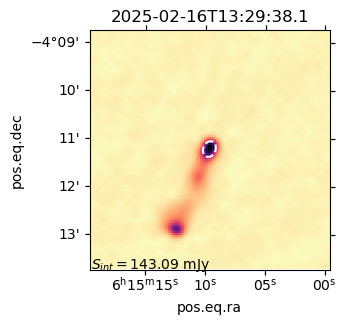

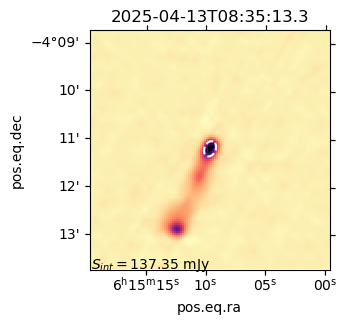

In [17]:
download_cutout(13499287)
tools_inspect_fits(13499287)

From the images we now see that the source finder has included some of the extended emission in the fit for the observation at 2024-08-21. This source ellipse is larger for this particular timestamp than the other timestamps. This leads to a larger integrated flux. We can check this by inspecting the peak flux measurements for this source.  

In [18]:
measurements[measurements.source == 13499287].sort(by='time')

#,source,local_rms,ra,ra_err,dec,dec_err,flux_peak,flux_peak_err,flux_int,flux_int_err,bmaj,err_bmaj,bmin,err_bmin,pa,err_pa,psf_bmaj,psf_bmin,psf_pa,flag_c4,chi_squared_fit,spectral_index,spectral_index_from_TT,has_siblings,image_id,time,snr,compactness,forced
0,13499287,0.6119999885559082,93.79027,0.00015833333134651184,-4.186944,0.00015833333134651184,66.2249984741211,0.26600000262260437,128.29100036621094,0.7089999914169312,19.700000762939453,0.07999999821186066,16.190000534057617,0.05999999865889549,155.52999877929688,0.009999999776482582,16.1299991607666,6.960000038146973,-19.200000762939453,False,5228.93603515625,-0.5799999833106995,True,True,7417,2023-07-02 04:59:35.800000,108.21078384394647,1.9371989931618274,False
1,13499287,0.6610000133514404,93.79047,0.00021944445040490893,-4.186988,0.00016666667328940496,62.21500015258789,0.2980000078678131,114.24099731445312,0.7789999842643738,19.31999969482422,0.10000000149011612,16.290000915527344,0.07000000029802322,151.22000122070312,0.019999999552965164,15.569999694824219,6.050000190734863,-19.670000076293945,True,18340.5,-0.5099999904632568,True,True,7558,2023-07-06 04:57:11.600000,94.12253993330772,1.8362291575064984,False
2,13499287,0.546999990940094,93.790151,0.00014722221427493625,-4.186796,0.00014166666401757135,71.56800079345703,0.24199999868869781,136.69400024414062,0.6389999985694885,20.850000381469727,0.05999999865889549,15.5600004196167,0.05000000074505806,146.63999938964844,0.009999999776482582,16.81999969482422,6.46999979019165,-22.93000030517578,False,3665.633056640625,-0.5400000214576721,True,True,7834,2023-08-30 22:26:45.400000,130.83729795033025,1.909987686237529,False
3,13499287,0.5519999861717224,93.790291,0.0001722222235467699,-4.186853,0.00014722221427493625,68.41899871826172,0.2329999953508377,139.1699981689453,0.6320000290870667,20.299999237060547,0.05999999865889549,16.5,0.05000000074505806,155.49000549316406,0.009999999776482582,16.84000015258789,7.679999828338623,-19.299999237060547,False,4856.11083984375,-0.4699999988079071,True,True,8111,2023-10-27 21:19:28.500000,123.94746455116244,2.034084110789529,False
4,13499287,0.5609999895095825,93.790367,0.00016944444841808742,-4.18681,0.00010555555423100789,68.16100311279297,0.22599999606609344,138.85699462890625,0.6269999742507935,20.049999237060547,0.05999999865889549,14.90999984741211,0.05000000074505806,159.9600067138672,0.009999999776482582,16.6299991607666,7.110000133514404,-19.829999923706055,False,5082.2109375,-0.7400000095367432,True,True,8359,2024-04-25 08:25:37.400000,121.49911655502571,2.037191183925586,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,13499287,0.4620000123977661,93.790572,0.00013611111376020643,-4.18761,0.00010833332935969035,66.48999786376953,0.12700000405311584,200.4199981689453,0.45100000500679016,30.68000030517578,0.029999999329447746,16.979999542236328,0.029999999329447746,155.8000030517578,0.0,28.219999313354492,8.75,-21.850000381469727,True,216109.8125,-0.8999999761581421,True,True,8960,2024-08-21 22:59:02.500000,143.91774043184208,3.0142879321425635,False
7,13499287,0.41100001335144043,93.790232,0.00016666667328940496,-4.187057,0.0001722222235467699,71.61299896240234,0.1770000010728836,143.21099853515625,0.47699999809265137,20.270000457763672,0.03999999910593033,14.75,0.03999999910593033,158.6999969482422,0.009999999776482582,16.690000534057617,6.980000019073486,-20.639999389648438,False,8102.85693359375,-0.7799999713897705,True,True,9162,2024-10-16 20:39:36.500000,174.24086772758096,1.9997905493434744,False
8,13499287,0.5239999890327454,93.790231,0.00017777777380413478,-4.186748,0.00014722221427493625,69.50599670410156,0.23000000417232513,137.56500244140625,0.6110000014305115,20.1200008392334,0.05999999865889549,15.920000076293945,0.05000000074505806,157.32000732421875,0.009999999776482582,16.549999237060547,7.28000020980835,-19.760000228881836,False,6495.36279296875,-0.6700000166893005,Tru

We indeed see that the peak flux is much more constant between epochs. So the variability in integrated flux is not real, but an artefact of a slightly larger source ellipse in a single timestamp.

### Example 2

Finally, we take a look at one more source from our `sources[filter1]` list. Below we plot the light curve for source 14213317

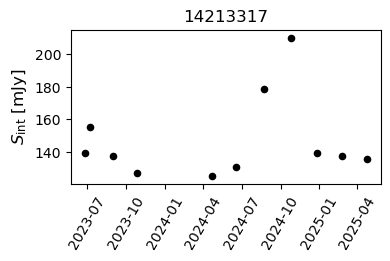

In [19]:
tools_plot_lc(source_ID = 14213317)

Again, we inspect the fits images to see whether the variability is real.

Saved 14213317_VAST_Extragal_DR1_compressed_multi_extension.fits to cutouts/
Plotting fits cutouts for source 14213317
There are 11 measurements/datapoints/images for this source.


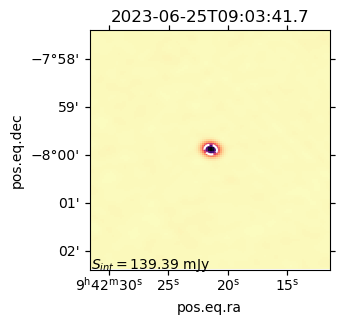

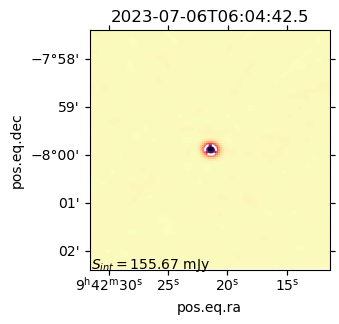

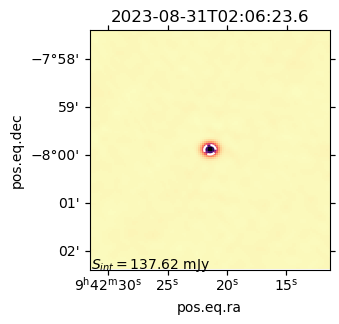

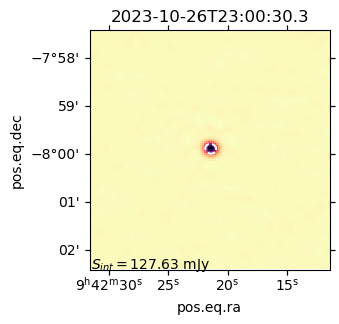

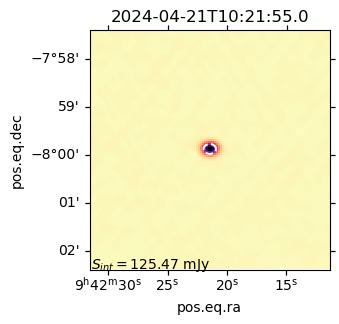

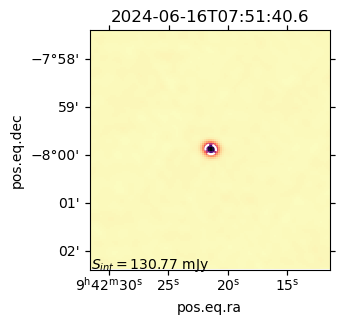

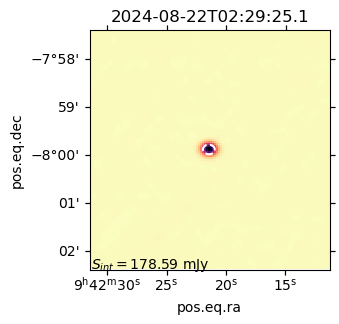

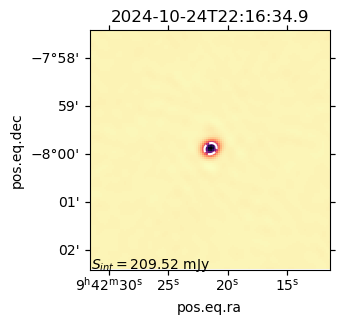

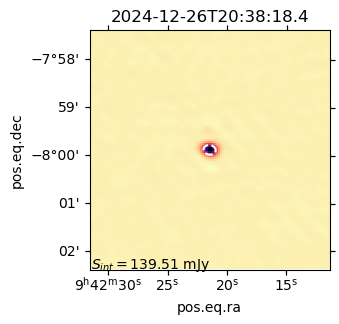

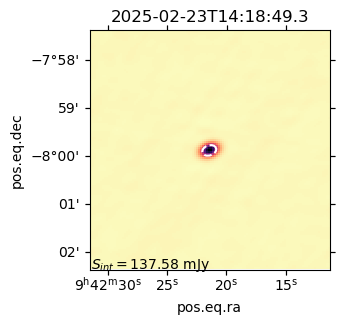

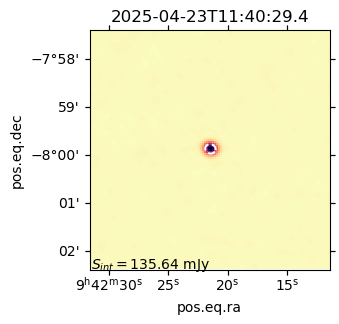

In [20]:
download_cutout(14213317)
tools_inspect_fits(14213317)

These fits images show a truly compact radio source, where the source finder and flux extraction have worked properly. This variability is likely to be real. A quick cross-match against the [Simbad database](https://simbad.cds.unistra.fr/simbad/sim-fcoo), shows that this source is a known blazar.


This tutorial shows some very basic filtering and visualisation strategies. Your science case might require complicated filtering, some of which might already be availabe within [VAST tools](https://vast-survey.org/vast-tools/).
In case you want to do more complex analysis and/or work with products that are not publicly available at this moment, consider [joining VAST!](https://vast-survey.org/Team/)


